Methods of Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Youtube video: https://www.youtube.com/watch?v=ydh0r4Lwzds&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=5

# Classification (Keras, Iris Dataset)

In [1]:
import pandas as pd
import torch
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, \
log_loss, recall_score, precision_score
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import  Dense, Dropout 
from tensorflow.keras import optimizers
import tensorflow as tf

In [2]:
iris_data = load_iris()
X_iris = iris_data.data
y_iris = iris_data.target

In [3]:
n_classes=len(set(y_iris))
n_classes

3

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris,test_size=0.3,random_state=10)

In [6]:
y_train[:5]

array([0, 1, 1, 2, 2])

In [7]:
y_train_bin = keras.utils.to_categorical(y_train, n_classes)
y_test_bin = keras.utils.to_categorical(y_test, n_classes)

In [8]:
y_train_bin[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [26]:
y_train[:3]

array([0, 1, 1])

In [9]:
n_feat=X_train.shape[1]
n_feat

4

In [10]:
model = Sequential()
model.add(Dense(128, input_dim=n_feat))
model.add(Dropout(0.15))
model.add(Dense(n_classes, activation='softmax'))

batch_size = 8
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=0.001), metrics=["accuracy"])
model.fit(X_train, y_train_bin, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test_bin))


Metal device set to: Apple M1 Pro
Epoch 1/15


2023-02-01 12:17:05.755176: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-01 12:17:05.755606: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2023-02-01 12:17:05.882233: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 8/14 [================>.............] - ETA: 0s - loss: 1.1701 - accuracy: 0.4531

2023-02-01 12:17:06.076502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 21ms/step - loss: 1.1272 - accuracy: 0.4571 - val_loss: 0.9725 - val_accuracy: 0.6222
Epoch 2/15
14/14 [==============================] - 0s 10ms/step - loss: 0.9080 - accuracy: 0.5810 - val_loss: 0.7838 - val_accuracy: 0.8222


2023-02-01 12:17:06.399711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 3/15
14/14 [==============================] - 0s 10ms/step - loss: 0.7986 - accuracy: 0.6000 - val_loss: 0.6902 - val_accuracy: 0.6222
Epoch 4/15
14/14 [==============================] - 0s 11ms/step - loss: 0.6036 - accuracy: 0.8000 - val_loss: 0.6131 - val_accuracy: 0.6889
Epoch 5/15
14/14 [==============================] - 0s 11ms/step - loss: 0.5642 - accuracy: 0.7619 - val_loss: 0.5739 - val_accuracy: 0.8000
Epoch 6/15
14/14 [==============================] - 0s 11ms/step - loss: 0.5517 - accuracy: 0.7810 - val_loss: 0.5574 - val_accuracy: 0.6222
Epoch 7/15
14/14 [==============================] - 0s 11ms/step - loss: 0.5377 - accuracy: 0.7429 - val_loss: 0.5034 - val_accuracy: 0.9556
Epoch 8/15
14/14 [==============================] - 0s 11ms/step - loss: 0.5277 - accuracy: 0.7238 - val_loss: 0.4803 - val_accuracy: 0.9111
Epoch 9/15
14/14 [==============================] - 0s 11ms/step - loss: 0.4540 - accuracy: 0.8095 - val_loss: 0.4810 - val_accuracy: 0.6444
Epoch 10/15
1

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________


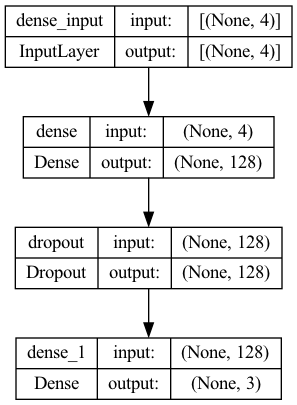

In [12]:
tf.keras.utils.plot_model(model, to_file='img.png', show_shapes=True, show_layer_names=True)

In [13]:
pred_proba = model.predict(X_test)
pred_proba[:5]

2/2 [==============================] - 0s 8ms/step


2023-02-01 12:19:41.670387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[3.5339404e-02, 5.8405030e-01, 3.8061029e-01],
       [6.1245635e-03, 3.3083972e-01, 6.6303575e-01],
       [9.6086740e-01, 3.8327225e-02, 8.0535631e-04],
       [4.9310021e-02, 5.4526722e-01, 4.0542275e-01],
       [9.4350231e-01, 5.4893591e-02, 1.6040894e-03]], dtype=float32)

In [14]:
pred=np.argmax(pred_proba,axis=1)
pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [15]:
y_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [16]:
classf_report=classification_report(y_test, pred)
print(classf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.94        17
           2       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [17]:
confusion_matrix(y_test, pred)

array([[14,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 14]])